In [1]:
# The first function should be coded in this cell 

def get_sales_data():
    '''Reads the input csv files and writes the data into appropriate data structures.'''
    import pandas as pd                                                        #importing the required libraries
    
    #INITIALIZATION
    FILE_PATH = '/USERS/CIS5357/EXAMS/'                                        #defining the file path and file name 
    CLIENTS_FILE_NAME = 'clients.csv'
    TRANSACTIONS_FILE_NAME = 'transactions.csv'
    
    #PROCESS
    df_clients = pd.read_csv(FILE_PATH + CLIENTS_FILE_NAME)                    #reading the csv file 1
    df_transactions = pd.read_csv(FILE_PATH + TRANSACTIONS_FILE_NAME)          #reading the csv file 2
    
    df_merged = df_clients.merge(df_transactions, on='custid', how='outer')    #merging both the csv files
    
    #OUTPUT
    return df_merged                                                           #returns the dataframe

In [2]:
def clean_up_sales_data(df_merged):
    '''Cleans up the data structure to prepare a new data structure required for the analysis.'''
    import pandas as pd                                                        #importing the required libraries
    
    #PROCESS
    df_sliced = df_merged[['custid','custname','state','invdate','cost','sales']]             #selecting the required columns
    df_cleaned_data = df_sliced.dropna()                                       #eliminating the NA data
        
    if type(df_cleaned_data['cost']) != float:                                 #checking if the cost column is a float
        df_cleaned_data['cost'] = df_cleaned_data['cost'].astype(float)        #if not float, converting to float
    if type(df_cleaned_data['sales']) != float:                                #checking if the sales column is a float
        df_cleaned_data['sales'] = df_cleaned_data['sales'].astype(float)      #if not float, converting to float
    if type(df_cleaned_data['invdate']) != 'datetime64[ns]':                   #checking if the invoice date column is a datetime type
        df_cleaned_data['invdate'] = df_cleaned_data['invdate'].astype('datetime64[ns]')      #if not datetime, converting to datetime
    #df_cleaned_data.info()
    return df_cleaned_data                                                     #returning the dataframe

In [3]:
def get_exchange_rate():
    '''Invokes a web API request and gets the exchange rate for USD to AUD.'''
    import json                                                                #importing the required libraries
    import requests

    #INPUT
    URL_STRING = "https://api.exchangerate.host/convert?from=USD&to=AUD"       #web API URL for converting from USD to AUD
    
    #PROCESS
    url_response = requests.get(URL_STRING)                                    #getting the web API response
    url_response_json = json.loads(url_response.text)

    exchange_rate = url_response_json['info']['rate']                          #fetching the exchange rate from json
    return exchange_rate                                                       #returns the exchange rate

In [4]:
def compute_data(df_cleaned_data):
    '''Computes the net profit in USD and AUD, and adds these both columns to the data structure for further analysis.'''
    #PROCESS
    df_cleaned_data['net_profit_in_USD'] = df_cleaned_data['sales'] - df_cleaned_data['cost']                     #calculating the net profit in USD
    EXCHANGE_RATE = get_exchange_rate()                                        #getting the exchange rate 
    df_cleaned_data['net_profit_in_AUD'] = EXCHANGE_RATE * df_cleaned_data['net_profit_in_USD']                   #calculating the net profit in AUD
    
    #OUTPUT
    display(df_cleaned_data)                                                   #displaying the dataframe
    
    return df_cleaned_data                                                     #returning the dataframe

In [5]:
def display_customer_info_of_lowest_netprofit(df_cleaned_data):
    '''Computes and displays the data of 10 customers with lowest net profit.'''
    #PROCESS
    df_grouped_by_custid = df_cleaned_data.groupby(['custid','custname']).agg({'net_profit_in_AUD':'sum'})        #generating dataframe grouped by customer id and customer name with sum of net profit in AUD
    df_grouped_by_custid.reset_index(inplace=True)                             #resetting the index of dataframe
    df_sorted = df_grouped_by_custid.sort_values(by='net_profit_in_AUD', ascending=True)      #sorting dataframe by net profit in ascending order
    df_customer_info_of_lowest_netprofit = df_sorted[['custname','net_profit_in_AUD']]        #selecting the required columns from the dataframe
    df_head_10_customers = df_customer_info_of_lowest_netprofit.head(10)       #selecting the 10 customers with lowest net profit values
    
    #OUTPUT
    display(df_head_10_customers)                                              #displaying the dataframe
    
    return df_head_10_customers                                                #returns the dataframe

In [6]:
def display_num_of_transactions_and_total_net_profit(df_cleaned_data):
    '''Displays total number of transactions and total profit in AUD.'''
    #PROCESS
    total_number_of_transactions = df_cleaned_data['sales'].count()            #computing the total number of transactions
    total_net_profit_in_AUD = df_cleaned_data['net_profit_in_AUD'].sum()       #computing the total net profit
    rounded_total_net_profit_in_AUD = round(total_net_profit_in_AUD,2)
    
    #OUTPUT
    print(f'Number of transactions:')
    display(total_number_of_transactions)                                      #displaying the total number of transactions
    print(f'Net profit in AUD:')
    display(rounded_total_net_profit_in_AUD)                                   #displaying the total net profit

In [7]:
def evaluate_sales_performance(df_cleaned_data):
    '''Evaluates sales performance of the states with profit lesser than 20% of total profit amount.'''
    #INITIALIZATION
    THRESHOLD_PERCENT = 20                                                     #initializing the threshold percentage
    
    #PROCESS
    total_net_profit_in_AUD = df_cleaned_data['net_profit_in_AUD'].sum()       #calculating the total net profit in AUD
    threshold_value = float(THRESHOLD_PERCENT/100)*total_net_profit_in_AUD     #calculating the threshold value based on threshold percentage
    
    df_grouped_by_state = df_cleaned_data.groupby(by='state').agg({'state':'count','net_profit_in_AUD':'sum'})    #generating dataframe grouped by state with count and netprofit columns
    df_grouped_by_state.rename(columns={'state':'number_of_transactions'}, inplace=True)                          #renaming the column
    df_filtered = df_grouped_by_state[df_grouped_by_state['net_profit_in_AUD']<threshold_value]                   #generating dataframe with net profit values lesser than threshold value
    #df_filtered.reset_index
    
    #OUTPUT
    display(df_filtered)                                                       #displays the dataframe generated above

In [8]:
def prepare_basic_analysis(df_cleaned_data):
    '''Invokes the functions which were prepared for the analysis of the data as per requirements.'''
    #PROCESS
    df_head_10_customers = display_customer_info_of_lowest_netprofit(df_cleaned_data)         #calling display_customer_info_of_lowest_netprofit() function
    display_num_of_transactions_and_total_net_profit(df_cleaned_data)          #calling the display_num_of_transactions_and_total_net_profit() function
    evaluate_sales_performance(df_cleaned_data)                                #calling the evaluate_sales_performance() function
    
    return df_head_10_customers                                                #returns the dataframe with 10 customers data with lowest net profit

In [9]:
def data_visualization(df_head_10_customers, df_cleaned_data):
    '''Prepares the charts for data visualization and plots them.'''
    import matplotlib                                                          #importing the required libraries
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

    #PROCESS
    plt.close('all')                                                           #closing all figures that may be open to recapture memory
    plt.style.use('seaborn')
    
    fig1 = plt.figure(figsize=(35,70), dpi=120)
    fig1, (ax1, ax2) = plt.subplots(2,1,figsize=(15,30), dpi=120)              #plotting the graphs
    fig1.suptitle('Data Visualization', fontsize=20)                           #title of the graph

    ax1.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the graph1
    ax1.set_title('10 Customers with lowest net profit in AUD', fontsize=15)
    ax1.set_xlabel('Customer Name', fontsize=12)
    ax1.set_ylabel('Net profit in AUD', fontsize=12)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax1.minorticks_on
    ax1_maxyvalue = df_head_10_customers['net_profit_in_AUD'].max()
    ax1.set_ylim(11.0,ax1_maxyvalue+0.3)
    ax1.tick_params(axis='y', direction='out', length=4, labelsize=12)
    ax1.tick_params(axis='x', direction='out', length=4, rotation=90, labelsize=8)
    ax1.bar(df_head_10_customers['custname'], df_head_10_customers['net_profit_in_AUD'], label='Net profit in AUD', color='skyblue')
    ax1.legend(loc='upper right')
    
    df_grouped_by_invdate = df_cleaned_data.groupby(by='invdate').agg({'custid':'count'})     #generating a dataframe with number of transactions by transaction date
    df_grouped_by_invdate.rename(columns={'custid':'number_of_transactions'}, inplace=True)
    df_grouped_by_invdate.reset_index(inplace=True)
    
    ax2.grid(True, which='major', linewidth=1, color='white')                  #setting the parameters for the graph2
    ax2.set_title('Number of sales transactions by transaction date', fontsize=15)
    ax2.set_xlabel('Invoice Date', fontsize=12)
    ax2.set_ylabel('Count of sales transactions', fontsize=12)
    ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax2.minorticks_on
    ax2_maxyvalue = df_grouped_by_invdate['number_of_transactions'].max()
    ax2.set_ylim(0,ax2_maxyvalue+2)
    ax2.tick_params(axis='y', direction='out', length=4, labelsize=12)
    ax2.tick_params(axis='x', direction='out', length=4, rotation=75, labelsize=12)
    ax2.plot(df_grouped_by_invdate['invdate'], df_grouped_by_invdate['number_of_transactions'], color='magenta', marker='D', markersize=4)
    
    plt.show()

In [10]:
def main():
    '''The main programs calls all the functions required for execution of the logic.'''
    #PROCESS
    df_merged = get_sales_data()                                               #calling the get_sales_data() function
    df_cleaned_data = clean_up_sales_data(df_merged)                           #calling the clean_up_sales_data() function
    df_cleaned_data = compute_data(df_cleaned_data)                            #calling the compute_data() function
    df_head_10_customers = prepare_basic_analysis(df_cleaned_data)             #calling the prepare_basic_analysis() function
    data_visualization(df_head_10_customers, df_cleaned_data)                  #calling the data_visualization() function
    
    #OUTPUT
    print(f'Normal Termination of the Application')                            #end of program message

<ipython-input-2-6f812b9934f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_data['cost'] = df_cleaned_data['cost'].astype(float)        #if not float, converting to float
<ipython-input-2-6f812b9934f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_data['sales'] = df_cleaned_data['sales'].astype(float)      #if not float, converting to float
<ipython-input-2-6f812b9934f8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,custid,custname,state,invdate,cost,sales,net_profit_in_USD,net_profit_in_AUD
9,10,Ajith Johnson,CA,2015-11-13,237.5,264.0625,26.5625,37.530395
10,10,Ajith Johnson,CA,2015-11-19,57.5,65.5625,8.0625,11.391579
11,10,Ajith Johnson,CA,2015-11-24,57.5,65.5625,8.0625,11.391579
12,10,Ajith Johnson,CA,2015-11-26,57.5,65.5625,8.0625,11.391579
13,10,Ajith Johnson,CA,2015-12-09,56.5,64.4875,7.9875,11.285611
14,11,John Patwardhan,PA,2015-11-13,57.5,65.5625,8.0625,11.391579
15,11,John Patwardhan,PA,2015-11-13,57.5,65.5625,8.0625,11.391579
16,11,John Patwardhan,PA,2015-11-26,42.0,48.9000,6.9000,9.749072
18,13,Nadine Nichols,AR,2015-11-13,57.5,65.5625,8.0625,11.391579
20,15,Allison Nguyen,TN,2015-11-13,57.5,65.5625,8.0625,11.391579


,custname,net_profit_in_AUD
16,Mariola Galloway,11.285611
15,Kim Howell,11.285611
21,Richard Bommareddy,11.285611
12,Albert Browning,11.391579
24,Jeffrey Wu,11.391579
11,Eric Taliaferro,11.391579
17,Chang Loyal,11.391579
9,Charles Monse,11.391579
22,Wayne Wen,11.391579
2,Nadine Nichols,11.391579


Number of transactions:


39

Net profit in AUD:


673.55

,number_of_transactions,net_profit_in_AUD
state,,
AR,1,11.391579
FL,1,11.391579
GA,3,34.174736
IL,2,30.536496
KS,1,82.125336
MI,1,19.038949
NJ,1,11.391579
NM,1,26.898255
NY,4,53.001749


<Figure size 4200x8400 with 0 Axes>

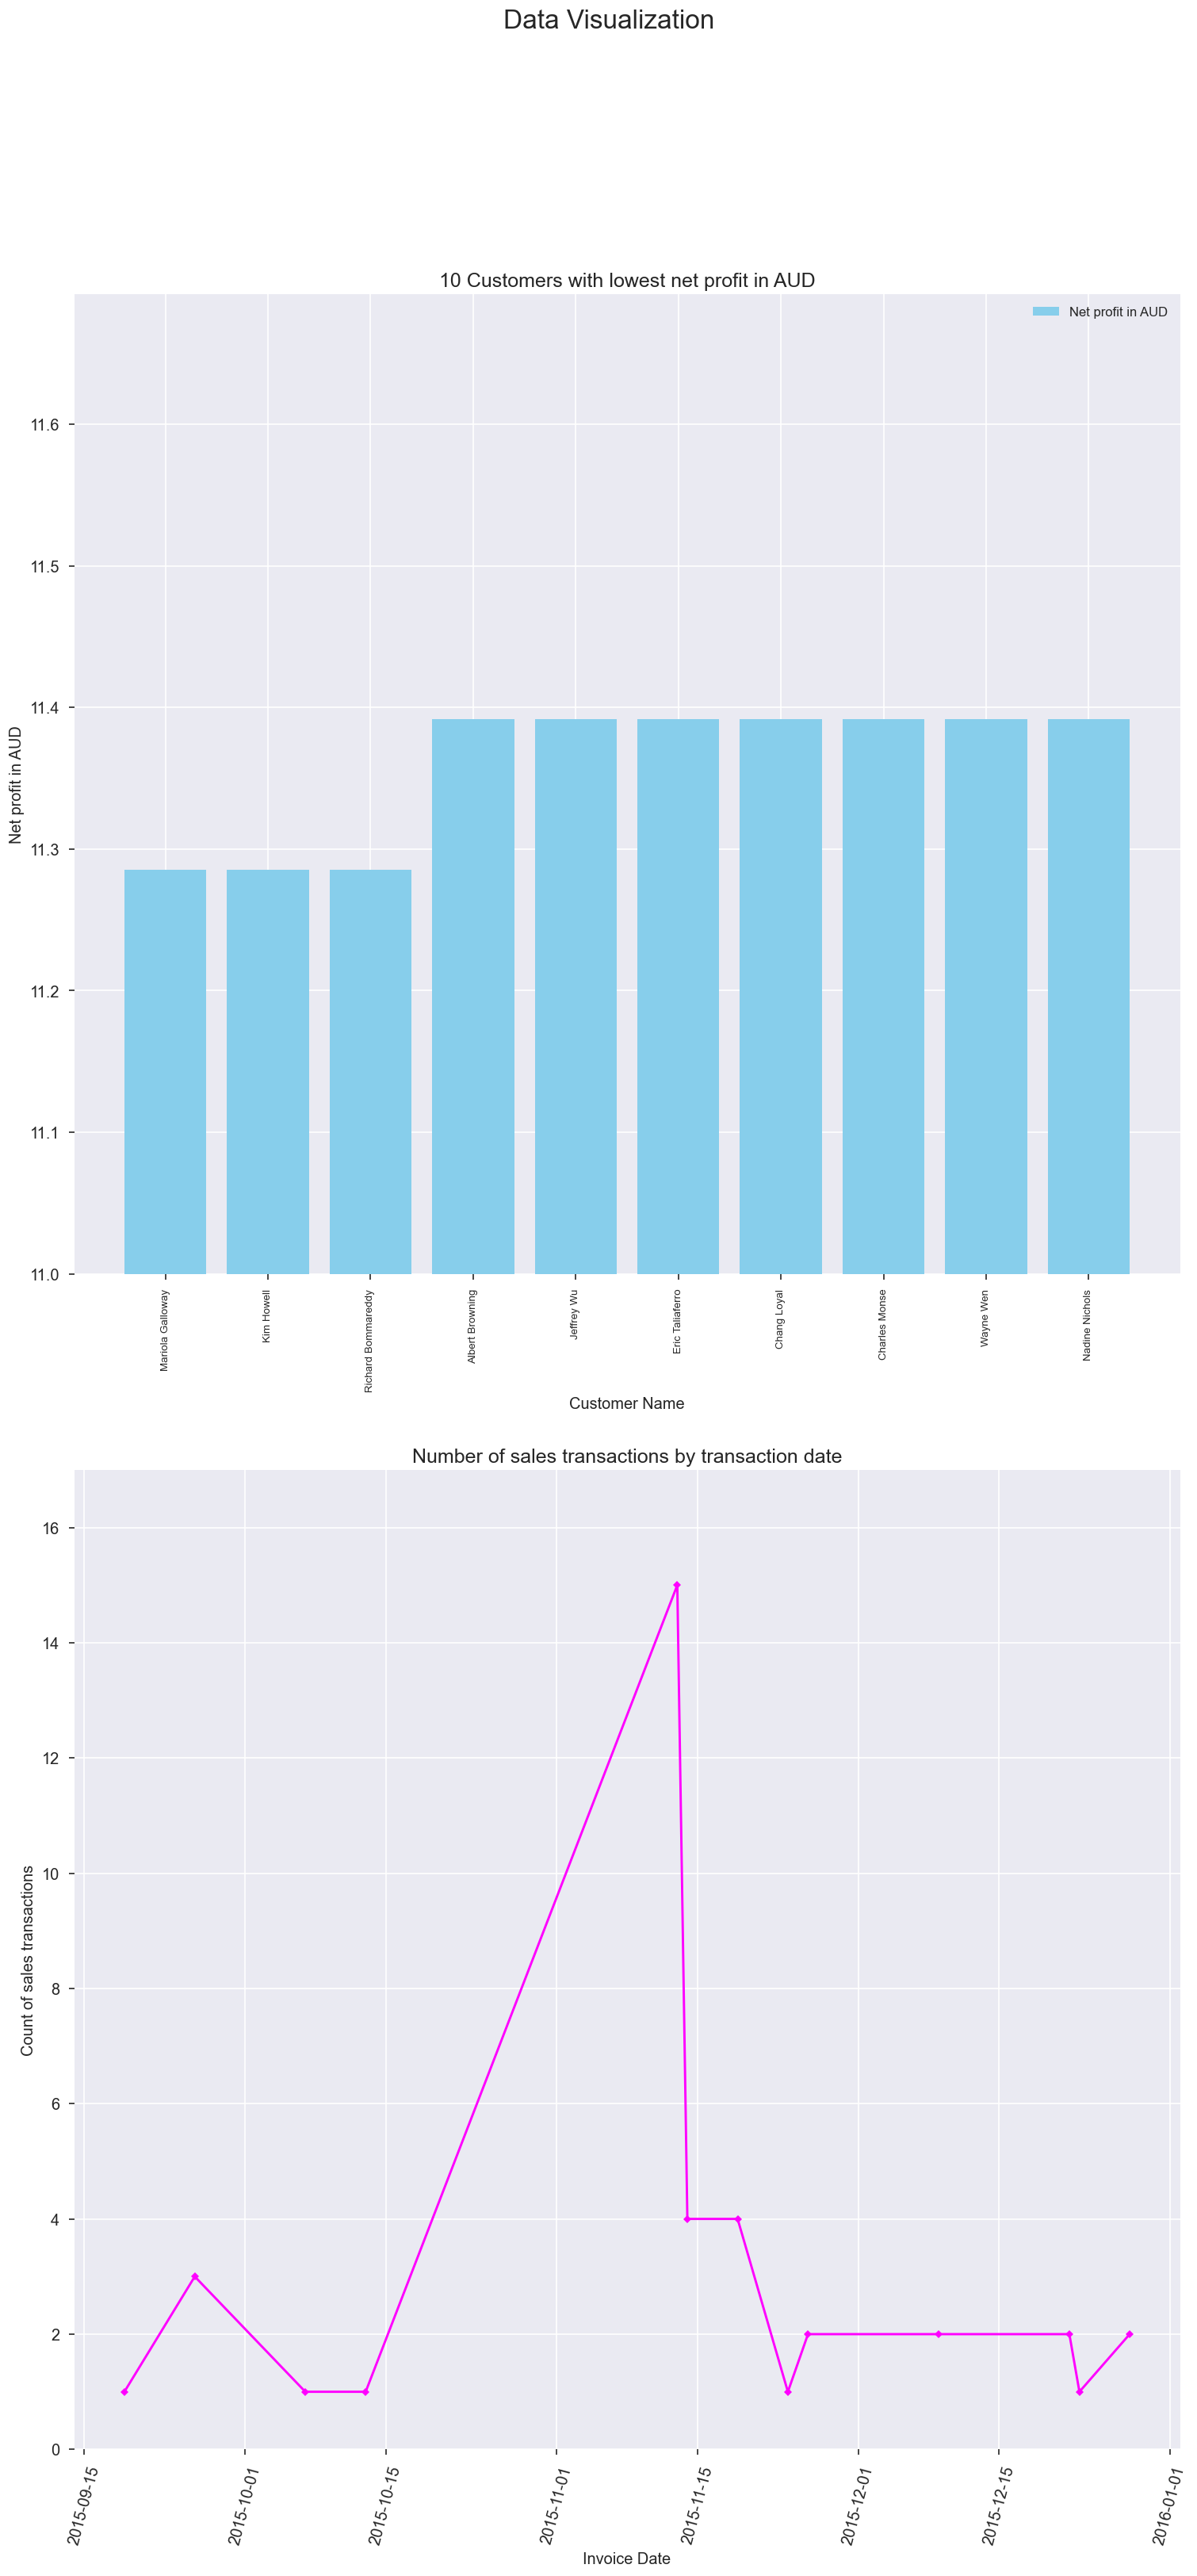

Normal Termination of the Application


In [11]:
main()        #calling the main function